<a href="https://colab.research.google.com/github/PLEX-GR00T/Cart_Pole_LQR/blob/main/Cart_Pole_LQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Name    : Priyak Thakkar
Program : Cart Pole (Linear Quadratic Regulator (LQR) / Algebraic Riccati Equation (ARE))
Date    : 25th November 2021
Time    : 2:05 AM (California, San Jose)
'''

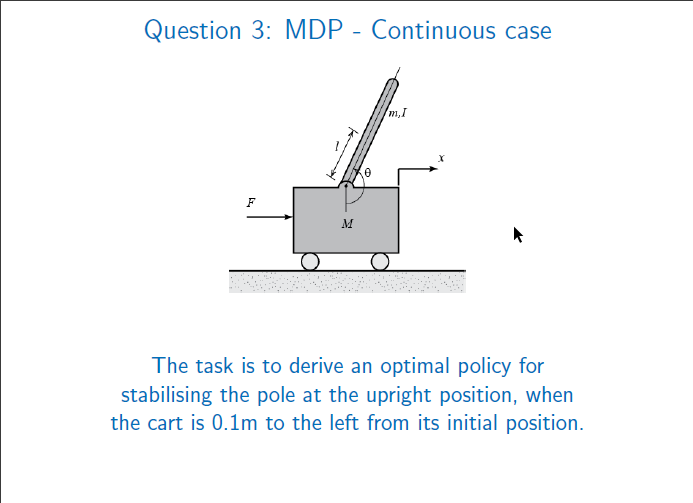

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random

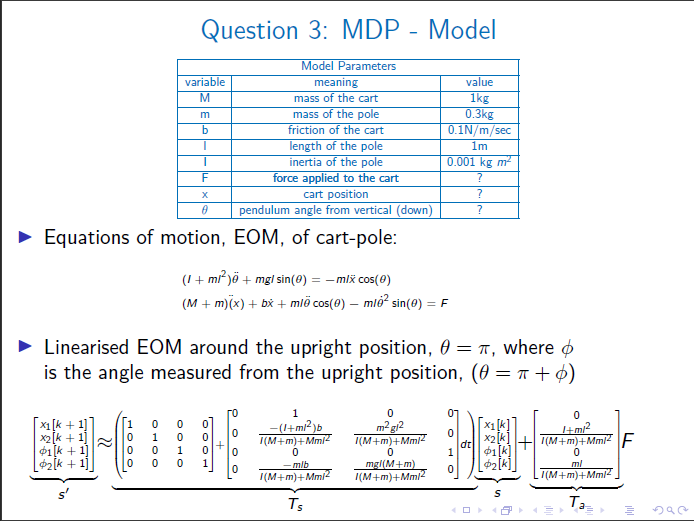

In [2]:
M = 1
m = 0.3
b = 0.1
l = 1
I = 0.001
g = 9.8

A = (I + (m*(l**2)))
B = (I*(M+m) + (M*m*(l)**2))
C = ((m**2)*g*(l**2))
D = (-m*l*b)
E = ((m*g*l)*(M+m))
f = (m*l)

AA = -A*b/B
BB = C/B
CC = D/B
DD = E/B

EE = A/B
FF = f/B

N = 1000

dt = 0.01

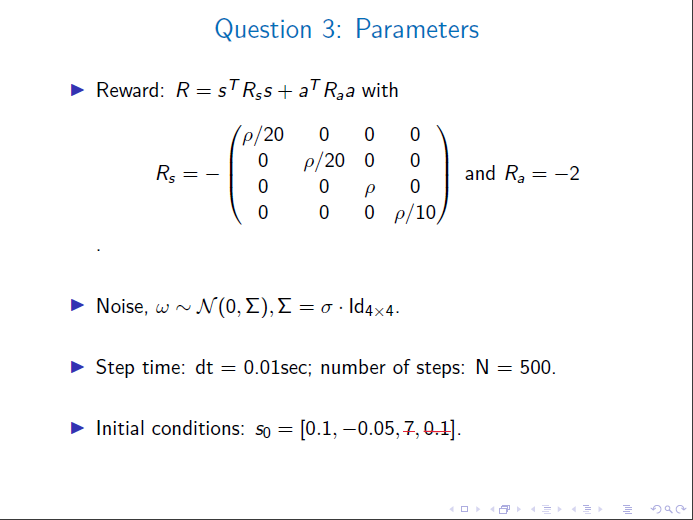

In [3]:
Tb = np.array([
            [0, 1,  0,  0],
            [0, AA, BB, 0],
            [0, 0,  0,  1],
            [0, CC, DD, 0]]) 

Ta = np.array([[0], 
              [EE], 
              [0], 
              [FF]]) *dt

Identity = np.identity(4, dtype = float)
Ts = Identity + (Tb) * dt

Ra = -2
rho = 10
sigma_val = 0.01
Rs = -np.array([[rho/20, 0, 0, 0],
                      [0, rho/20, 0, 0],
                      [0, 0, rho, 0],
                      [0, 0, 0, rho/10]])

In [4]:
sigma = np.identity(4) * sigma_val

v = dict()
q = dict()

v[N] = Rs
q[N] = 0

F = dict()
F[1] = 0
S = dict()
S[1] = np.array([[0.1], 
          [-0.05], 
          [0.1], 
          [0.01]])

L = dict()

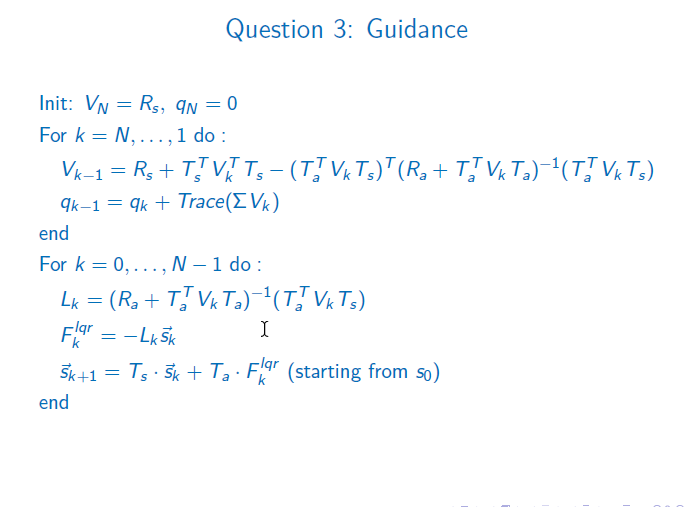

In [5]:
for i in range(N, 1, -1):
  v[i-1] = Rs + (Ts.T @ v[i].T @ Ts) - ((Ta.T @ v[i] @ Ts).T) * ((Ra + Ta.T @ v[i] @ Ta)**(-1)) @ (Ta.T @ v[i] @ Ts)
  q[i-1] = q[i] + np.trace(sigma @ v[i])

for i in range(1, N+1, 1):
    L[i] = ((Ra + Ta.T @ v[i] @ Ta)**(-1)) @ (Ta.T @ v[i] @ Ts)
    F[i] = -(L[i] @ S[i])
    S[i+1] = Ts @ S[i] + Ta * F[i] #+ np.random.normal(0, sigma_val, 1)

Text(0.5, 1.0, 'Angular_Velocity v/s Time')

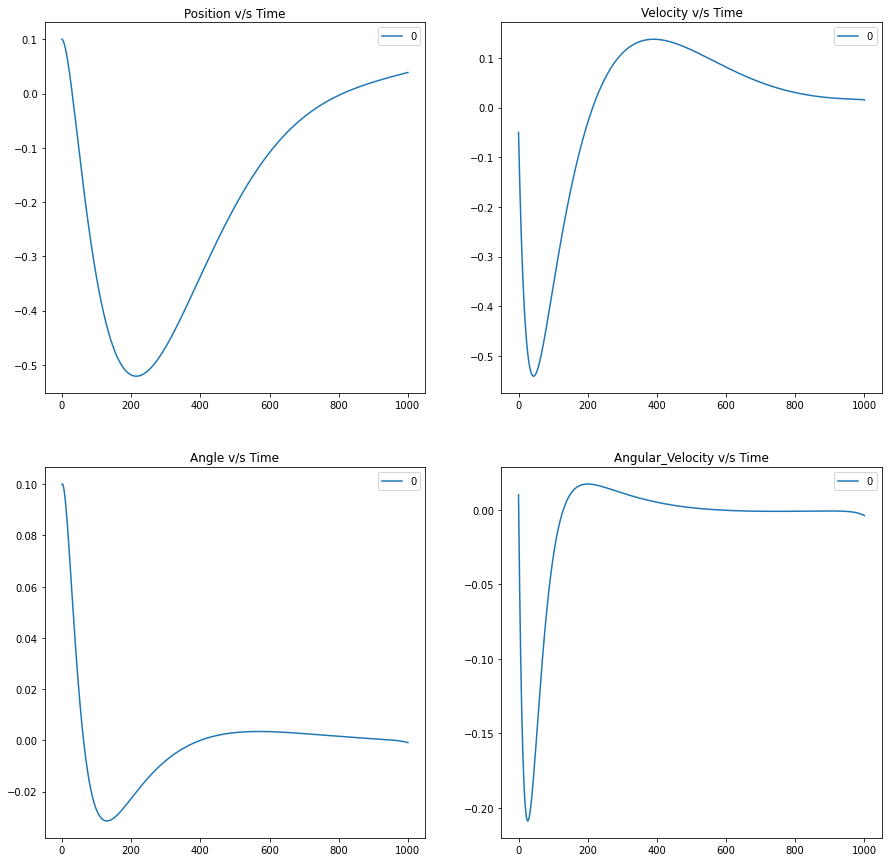

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
pd.DataFrame([float(S[i][0][0]) for i in S]).plot(ax=axes[0,0]); axes[0,0].set_title('Position v/s Time')
pd.DataFrame([float(S[i][1][0]) for i in S]).plot(ax=axes[0,1]); axes[0,1].set_title('Velocity v/s Time')
pd.DataFrame([float(S[i][2][0]) for i in S]).plot(ax=axes[1,0]); axes[1,0].set_title('Angle v/s Time')
pd.DataFrame([float(S[i][3][0]) for i in S]).plot(ax=axes[1,1]); axes[1,1].set_title('Angular_Velocity v/s Time')

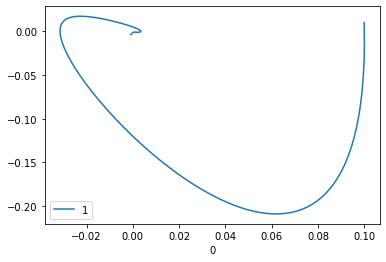

In [7]:
pd.DataFrame({'0':[float(S[i][2][0]) for i in S], '1':[float(S[i][3][0]) for i in S]}).plot('0','1')

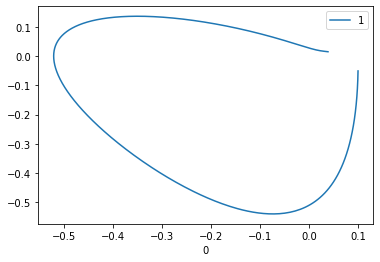

In [8]:
pd.DataFrame({'0':[float(S[i][0][0]) for i in S], '1':[float(S[i][1][0]) for i in S]}).plot('0','1')

Text(0.5, 0.98, 'rho = 10, sigma = 0.01')

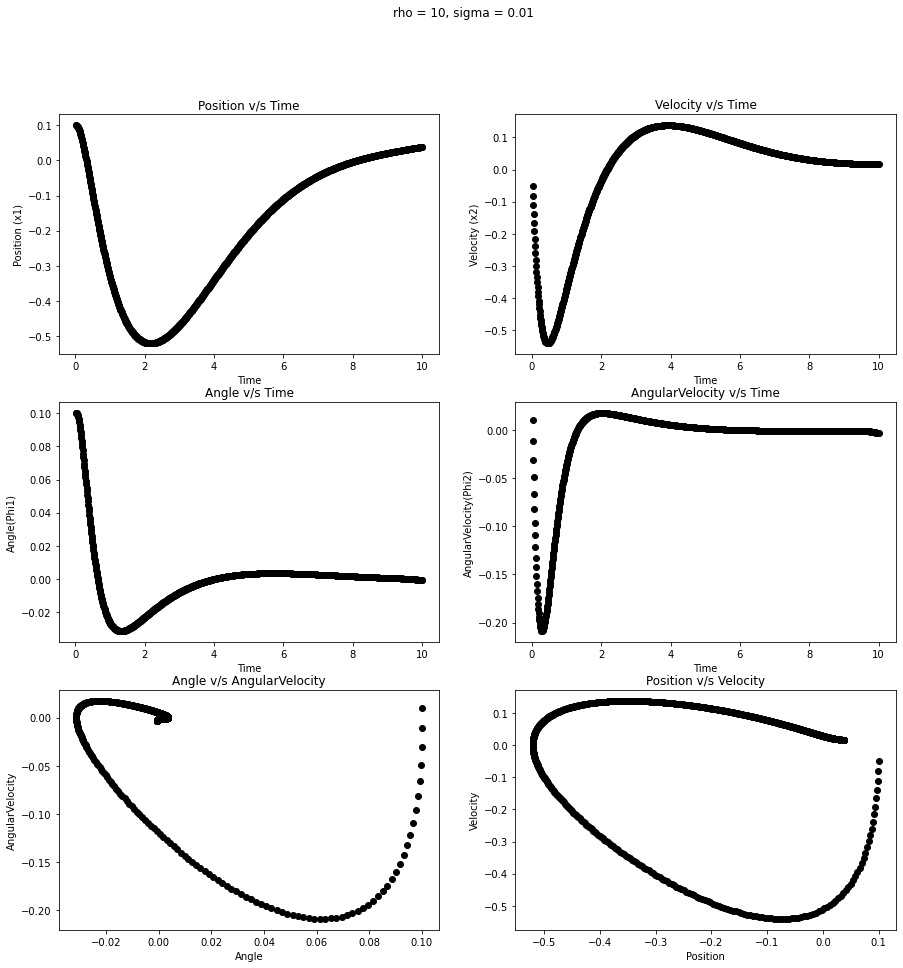

In [9]:
time = [dt*i for i in range(1,N+1)]

fig, axes = plt.subplots(3, 2, figsize=(15,15))

for i in range(1, N):
  axes[0][0].scatter(time[i], S[i][0], color = 'black')
  axes[0][1].scatter(time[i], S[i][1], color = 'black')
  axes[1][0].scatter(time[i], S[i][2], color = 'black')
  axes[1][1].scatter(time[i], S[i][3], color = 'black')
  axes[2][0].scatter(S[i][2], S[i][3], color = 'black')
  axes[2][1].scatter(S[i][0], S[i][1], color = 'black')

axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Position (x1)')
axes[0][0].title.set_text('Position v/s Time')

axes[0][1].set_xlabel('Time')
axes[0][1].set_ylabel('Velocity (x2)')
axes[0][1].title.set_text('Velocity v/s Time')

axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Angle(Phi1)')
axes[1][0].title.set_text('Angle v/s Time')

axes[1][1].set_xlabel('Time')
axes[1][1].set_ylabel('AngularVelocity(Phi2)')
axes[1][1].title.set_text('AngularVelocity v/s Time')

axes[2][0].set_xlabel('Angle')
axes[2][0].set_ylabel('AngularVelocity')
axes[2][0].title.set_text('Angle v/s AngularVelocity')

axes[2][1].set_xlabel('Position')
axes[2][1].set_ylabel('Velocity')
axes[2][1].title.set_text('Position v/s Velocity')

fig.suptitle('rho = {}, sigma = {}'.format(rho, sigma_val))